In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel, chi2_contingency
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df = pd.read_csv('Wholesale+Customers+Data.csv')
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [125]:
df.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [103]:
df.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.00,440.00,440.00,440.00,440.00,440.00,440.00
mean,220.50,12000.30,5796.27,7951.28,3071.93,2881.49,1524.87
std,127.16,12647.33,7380.38,9503.16,4854.67,4767.85,2820.11
min,1.00,3.00,55.00,3.00,25.00,3.00,3.00
25%,110.75,3127.75,1533.00,2153.00,742.25,256.75,408.25
50%,220.50,8504.00,3627.00,4755.50,1526.00,816.50,965.50
75%,330.25,16933.75,7190.25,10655.75,3554.25,3922.00,1820.25
max,440.00,112151.00,73498.00,92780.00,60869.00,40827.00,47943.00


In [127]:
df.describe(include='object')

,Channel,Region
count,440,440
unique,2,3
top,Hotel,Other
freq,298,316


In [128]:
df_new=df.groupby('Channel').sum()
df_new.drop(['Buyer/Spender'], axis=1, inplace=True)
df_new['Total'] = df_new['Fresh'] + df_new['Milk'] + df_new['Grocery'] + df_new['Frozen'] + df_new['Detergents_Paper'] + df_new['Delicatessen']
df_new

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
Channel,,,,,,,
Hotel,4015717,1028614,1180717,1116979,235587,421955,7999569
Retail,1264414,1521743,2317845,234671,1032270,248988,6619931


In [129]:
df_new['Total'].sort_values(ascending=False)

Channel
Hotel     7999569
Retail    6619931
Name: Total, dtype: int64

Hotel has spent more than Retail

In [130]:
df['Region'].unique()

array(['Other', 'Lisbon', 'Oporto'], dtype=object)

In [131]:
DFR = df.groupby('Region').sum()
DFR.drop(['Buyer/Spender'], axis=1, inplace=True)
DFR['Total'] = DFR['Fresh'] + DFR['Milk'] + DFR['Grocery'] + DFR['Frozen'] + DFR['Detergents_Paper'] + DFR['Delicatessen']
DFR

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
Region,,,,,,,
Lisbon,854833,422454,570037,231026,204136,104327,2386813
Oporto,464721,239144,433274,190132,173311,54506,1555088
Other,3960577,1888759,2495251,930492,890410,512110,10677599


In [132]:
DFR.sort_values(by='Total', ascending=False)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
Region,,,,,,,
Other,3960577,1888759,2495251,930492,890410,512110,10677599
Lisbon,854833,422454,570037,231026,204136,104327,2386813
Oporto,464721,239144,433274,190132,173311,54506,1555088


other has the higest spend

In [106]:
table = pd.pivot_table(data=df,index=['Region'])
a = table.drop('Buyer/Spender', axis=1)

(array([0, 1, 2]),
 [Text(0, 0, 'Lisbon'), Text(1, 0, 'Oporto'), Text(2, 0, 'Other')])

<Figure size 1152x720 with 0 Axes>

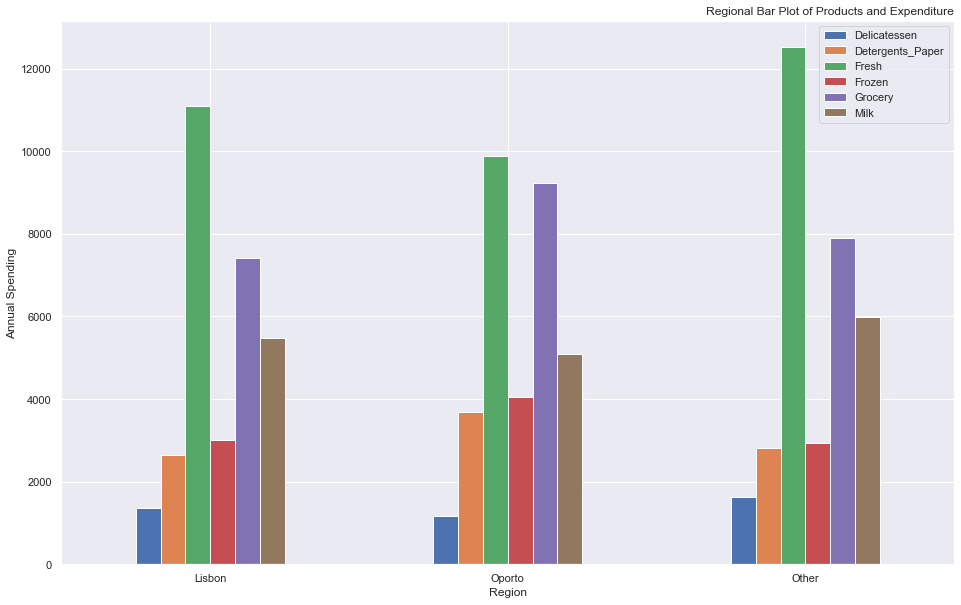

In [107]:
plt.figure(figsize=(16,10))
a.plot(kind='bar', figsize=(16,10))
plt.title('Regional Bar Plot of Products and Expenditure', loc='right')
plt.xlabel('Region')
plt.ylabel('Annual Spending')
plt.xticks(rotation=0)

In [108]:
table2 = pd.pivot_table(data=df,index=['Channel'])
b=table2.drop('Buyer/Spender', axis=1)

(array([0, 1]), [Text(0, 0, 'Hotel'), Text(1, 0, 'Retail')])

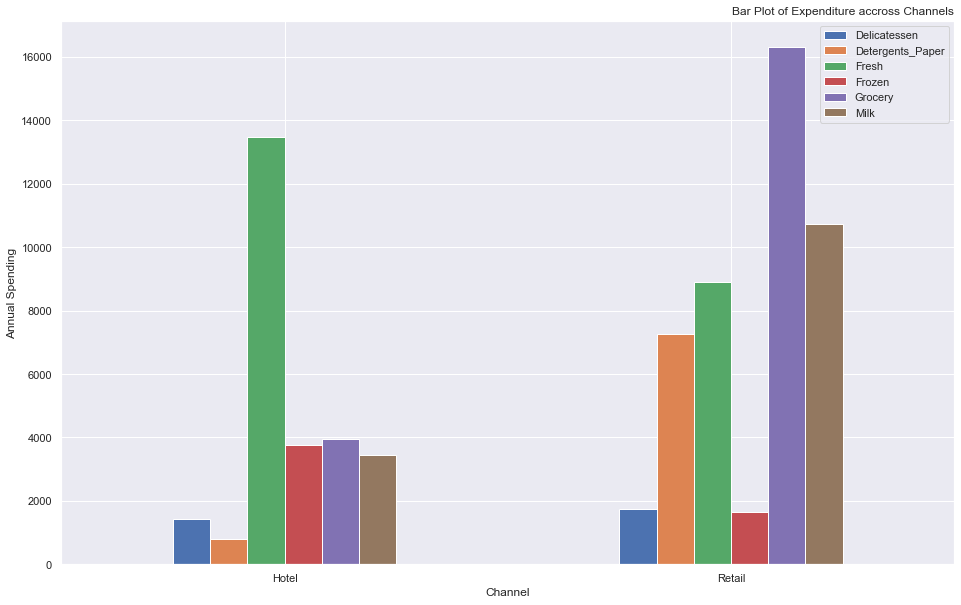

In [110]:
b.plot(kind='bar', figsize=(16,10))
plt.title('Bar Plot of Expenditure accross Channels', loc='right')
plt.xlabel('Channel')
plt.ylabel('Annual Spending')
plt.xticks(rotation=0)

In [137]:
coeff_varFresh = df['Fresh'].std()/df['Fresh'].mean()
coeff_varMilk = df['Milk'].std()/df['Milk'].mean()
coeff_varGroc = df['Grocery'].std()/df['Grocery'].mean()
coeff_varFrozen = df['Frozen'].std()/df['Frozen'].mean()
coeff_varDet    = df['Detergents_Paper'].std()/df['Detergents_Paper'].mean()
coeff_varDeli   = df['Delicatessen'].std()/df['Delicatessen'].mean()

print('The coefficient of variation of Fresh:', coeff_varFresh)
print('The coefficient of variation of Milk:', coeff_varMilk)
print('The coefficient of variation of Grocery:', coeff_varGroc)
print('The coefficient of variation of Frozen:', coeff_varFrozen)
print('The coefficient of variation of Detergents Paper:', coeff_varDet)
print('The coefficient of variation of Delicatessen:', coeff_varDeli)

The coefficient of variation of Fresh: 1.0539179237473149
The coefficient of variation of Milk: 1.2732985840065414
The coefficient of variation of Grocery: 1.1951743730016824
The coefficient of variation of Frozen: 1.5803323836352914
The coefficient of variation of Detergents Paper: 1.6546471385005155
The coefficient of variation of Delicatessen: 1.8494068981158382


Using Coefficient of Variation we find out the least value is of Category “Fresh” (1.05) and highest value is of Category “Delicatessen” (1.84)

So from the given data it is clear that most inconsistent behavior shown by item – Delicatessen

And least inconsistent behavior shown by item – Fresh. As per the analysis, I find out that there are inconsistencies in spending of different items (by calculating Coefficient of Variation), which should be minimized. The spending of Hotel and Retail channel are different which should be more or less equal. And also spent should equal for different regions. Need to focus on other items also than “Fresh” and “Grocery”

Text(0, 0.5, 'Annual Spending')

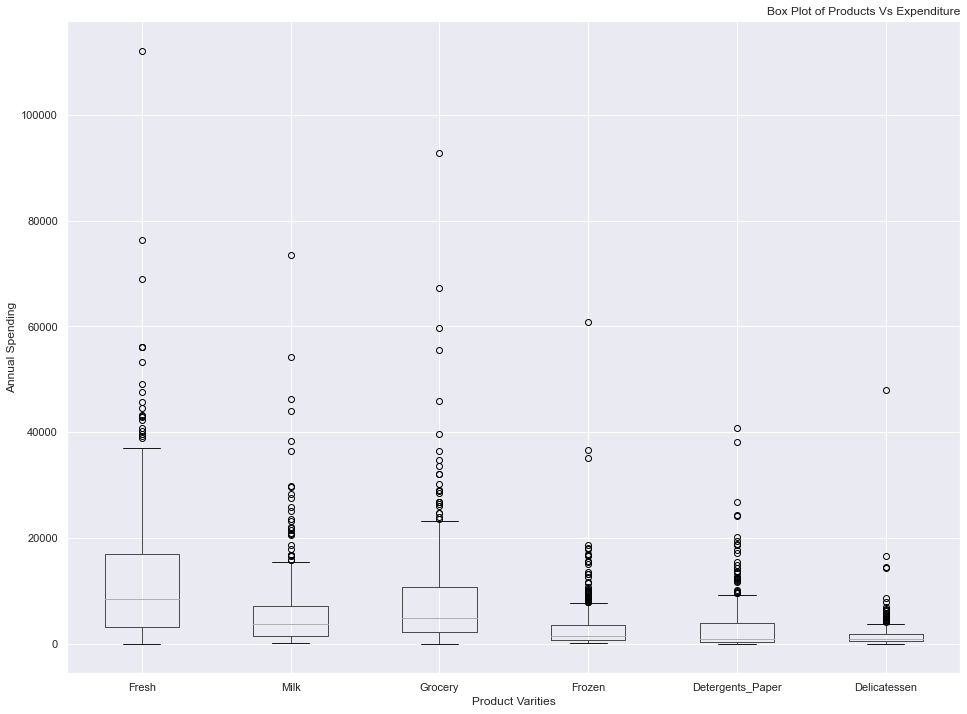

In [111]:
df.drop(labels='Buyer/Spender', axis=1).boxplot(figsize=(16,12))
plt.title('Box Plot of Products Vs Expenditure', loc='right')
plt.xlabel('Product Varities')
plt.ylabel('Annual Spending')

In [112]:
mydata= pd.read_csv('Survey-1.csv')
mydata.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.90,Full-Time,50.00,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.60,Part-Time,25.00,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.50,Part-Time,45.00,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.50,Full-Time,40.00,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.80,Unemployed,40.00,2,4,500,Laptop,100


In [113]:
pd.crosstab(mydata['Gender'], mydata['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [114]:
pd.crosstab(mydata['Gender'], mydata['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [115]:
pd.crosstab(mydata['Gender'], mydata['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [116]:
pd.crosstab(mydata['Gender'], mydata['Computer'])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [117]:
mydata['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [119]:
print('The probabilty of a randomly selected CMSU student will be a male:', round(29/62*100,2),'%')

The probabilty of a randomly selected CMSU student will be a male: 46.77 %


In [120]:
print('The probability of a randomly selected CMSU student will be a female:', round(33/62*100,2),'%')

The probability of a randomly selected CMSU student will be a female: 53.23 %


2.3.1. Find the conditional probability of different majors among the male students in CMSU.

2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [80]:
pd.crosstab(mydata['Gender'], mydata['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [81]:
print('The conditional probability of Males opting for Accounting is:',round((4/29*100), 2),'%')
print('The conditional probability of Males opting for CIS is:',round((1/29*100), 2),'%')
print('The conditional probability of Males opting for Economics/Finance is:',round((4/29*100), 2),'%')
print('The conditional probability of Males opting for International Business is:', round((2/29*100), 2),'%')
print('The conditional probability of Males opting for Management is:', round((6/29*100), 2),'%')
print('The conditional probability of Males opting for Other is:', round((4/29*100), 2),'%')
print('The conditional probability of Males opting for Retail/Marketing is:',round((5/29*100), 2),'%')
print('The conditional probability of Males opting for Undecided is:',round((3/29*100), 2),'%')

The conditional probability of Males opting for Accounting is: 13.79 %
The conditional probability of Males opting for CIS is: 3.45 %
The conditional probability of Males opting for Economics/Finance is: 13.79 %
The conditional probability of Males opting for International Business is: 6.9 %
The conditional probability of Males opting for Management is: 20.69 %
The conditional probability of Males opting for Other is: 13.79 %
The conditional probability of Males opting for Retail/Marketing is: 17.24 %
The conditional probability of Males opting for Undecided is: 10.34 %


In [82]:
print('The conditional probability of Females opting for Accounting is:', round((3/33*100), 2),'%')
print('The conditional probability of Females opting for CIS is:', round((3/33*100), 2),'%')
print('The conditional probability of Females opting for Economics/Finance is:', round((7/33*100), 2),'%')
print('The conditional probability of Females opting for International Business is:', round((4/33*100), 2),'%')
print('The conditional probability of Females opting for Management is:', round((4/33*100), 2),'%')
print('The conditional probability of Females opting for Other is:', round((3/33*100), 2),'%')
print('The conditional probability of Females opting for Retail/Marketing is:',round((9/33*100),2),'%') 
print('The conditional probability of Females opting for Undecided is:', 0/29,'%')

The conditional probability of Females opting for Accounting is: 9.09 %
The conditional probability of Females opting for CIS is: 9.09 %
The conditional probability of Females opting for Economics/Finance is: 21.21 %
The conditional probability of Females opting for International Business is: 12.12 %
The conditional probability of Females opting for Management is: 12.12 %
The conditional probability of Females opting for Other is: 9.09 %
The conditional probability of Females opting for Retail/Marketing is: 27.27 %
The conditional probability of Females opting for Undecided is: 0.0 %


2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop.

In [83]:
pd.crosstab(mydata['Gender'], mydata['Grad Intention'], margins=True)

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [84]:
print('The probabilty of a randomly chosen student is a male and intents to graduate is:', round((17/29*100),2),'%')

The probabilty of a randomly chosen student is a male and intents to graduate is: 58.62 %


In [85]:
pd.crosstab(mydata['Gender'], mydata['Computer'], margins=True)

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


In [86]:
print('The probabilty of a randomly chosen student is a female and does not have a laptop is', round((4/33*100),2),'%')

The probabilty of a randomly chosen student is a female and does not have a laptop is 12.12 %


2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?

2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [87]:
pd.crosstab(mydata['Gender'], mydata['Employment'], margins=True)

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


In [88]:
ProbMale=29/62
ProbFull=10/62 
ProbMaleinFull=7/62

In [89]:
P= ProbMale+ProbFull-ProbMaleinFull
P

0.5161290322580645

In [90]:
print('The probabilty of a randomly chosen student is a male or has full time employment is', round((P*100),2),'%')

The probabilty of a randomly chosen student is a male or has full time employment is 51.61 %


In [91]:
pd.crosstab(mydata['Gender'], mydata['Major'], margins=True)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


Probability of female student in international business= 4/33
probability of female student in Management =4/33

i.e. P(Fem IB or Fem Manag)= P(Fem IB)+ P(Fem Management) since the events are independent

In [92]:
print('The probability of a female student majoring in IB or Management is', round(((4/33)+(4/33))*100, 2), '%')

The probability of a female student majoring in IB or Management is 24.24 %


In [93]:
pd.crosstab(mydata['Gender'], mydata['Grad Intention']).drop(labels='Undecided', axis=1)

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


to check if the events are independent 
P(A in B)= P(A)XP(B)

so, P(A)= GradYes
    P(B)= Female

In [121]:
PofA= 28/40
PofAgivenB=11/20
PoB=20/30

In [124]:
PofA

0.7

In [208]:
PofA*PoB/PoB

0.7

In [207]:
PofAgivenB

0.55

In [201]:
if PofAgivenB == PofA:
    print('Being female is independent on Grad Intention')
else:
    print('Being female is not independent on Grad Intention')
    

Being female is not independent on Grad Intention


In [192]:
P_A_B

0.55

2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.

Answer the following questions based on the data

2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

In [290]:
pd.crosstab(mydata['Gender'], mydata['GPA'], margins=True)

GPA,2.3,2.4,2.5,2.6,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,All
Gender,,,,,,,,,,,,,,,,,
Female,1,1,2,0,1,3,5,2,4,3,2,4,1,2,1,1,33
Male,0,0,4,2,2,1,2,5,2,2,5,2,2,0,0,0,29
All,1,1,6,2,3,4,7,7,6,5,7,6,3,2,1,1,62


In [215]:
print('The probability of a randomly selected student has their GPA less than 3 is', round((17/62)*100,2),'%')

The probability of a randomly selected student has their GPA less than 3 is 27.42 %


In [216]:
pd.crosstab(mydata['Gender'], mydata['Salary'])

Salary,25.00,30.00,35.00,37.00,37.50,40.00,42.00,45.00,47.00,47.50,50.00,52.00,54.00,55.00,60.00,65.00,70.00,78.00,80.00
Gender,,,,,,,,,,,,,,,,,,,
Female,0,5,1,0,1,5,1,1,0,1,5,0,0,5,5,0,1,1,1
Male,1,0,1,1,0,7,0,4,1,0,4,1,1,3,3,1,0,0,1


In [219]:
print('The conditional probability of a randomly selcted male earning salary 50 or more is', round((14/29)*100,2),'%')

The conditional probability of a randomly selcted male earning salary 50 or more is 48.28 %


In [220]:
print('The conditional probability of a randomly selcted female earning salary 50 or more is', round((18/33)*100,2),'%')

The conditional probability of a randomly selcted female earning salary 50 or more is 54.55 %


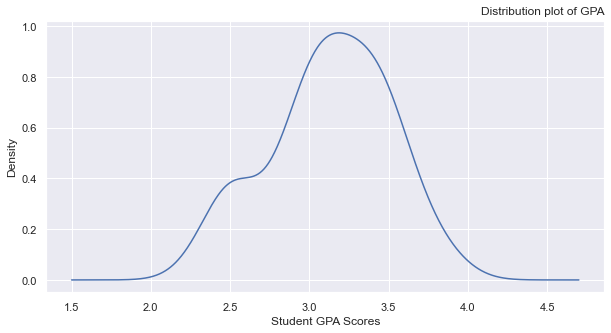

In [126]:
plt.figure(figsize=(10,5))
#sns.displot(mydata['GPA'], kind='kde', color='red')
mydata['GPA'].plot(kind='density')
plt.xlabel('Student GPA Scores')
plt.title('Distribution plot of GPA', loc='right')
plt.show()

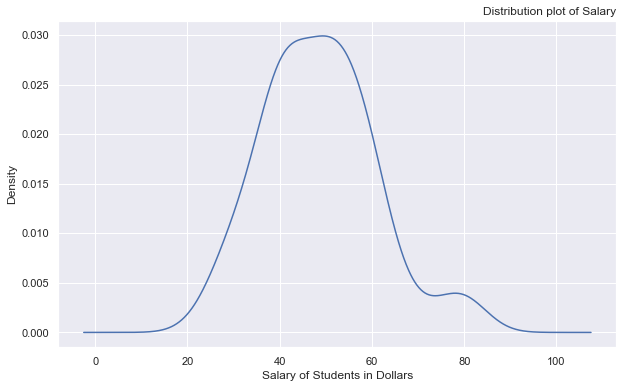

In [97]:
plt.figure(figsize=(10,6))
#sns.displot(mydata['Salary'], kind='kde')
mydata['Salary'].plot(kind='density')
plt.xlabel('Salary of Students in Dollars')
plt.title('Distribution plot of Salary', loc='right')
plt.show()

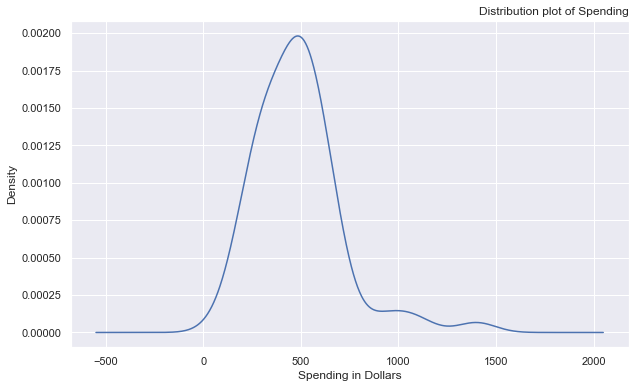

In [98]:
plt.figure(figsize=(10,6))
mydata['Spending'].plot(kind='density')
plt.xlabel('Spending in Dollars')
plt.title('Distribution plot of Spending', loc='right')
plt.show()

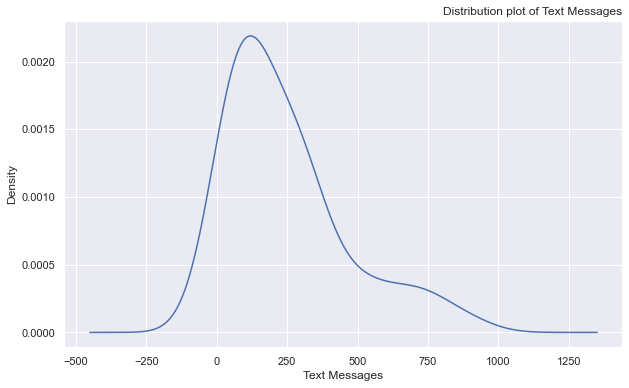

In [100]:
plt.figure(figsize=(10,6))
mydata['Text Messages'].plot(kind='density')
plt.xlabel('Text Messages')
plt.title('Distribution plot of Text Messages', loc='right')
plt.show()

h0= data is normally distributed
h1= data is not normally distributed
significance level=0.05


In [289]:
P=0.05
GPA=stats.shapiro(mydata['GPA'])
Salary=stats.shapiro(mydata['Salary'])
Text=stats.shapiro(mydata['Text Messages'])
Spending=stats.shapiro(mydata['Spending'])
print('The test statistic for GPA from Shapiro test is:',GPA[0])
print('The corresponding p-Value is found to be:', GPA[1])
print('')
print('The test statistic for Salary from Shapiro test is:',Salary[0])
print('The corresponding p-Value is found to be:', Salary[1])
print('')
print('The test statistic for Spendings from Shapiro test is:',Spending[0])
print('The corresponding p-Value is found to be:', Spending[1])
print('')
print('The test statistic for Text Messages from Shapiro test is:',Text[0])
print('The corresponding p-Value is found to be:', Text[1])
print('')
if GPA[1]<p:
    print('We do not have enough evidence to prove that GPA follows a normal distribution. Hence we reject the null hypothesis.')
else:
    print('We have evidence to prove that GPA is normally distributed at 95% confidence level. Hence, We accept the null hypthesis.')

if Salary[1]<p:
    print('We do not have enough evidence to prove that Salary follows a normal distribution. Hence we reject the null hypothesis.')
else:
    print('We have evidence to prove that Salary is normally distributed at 95% confidence level. Hence, We accept the null hypthesis.')

if Text[1]<p:
    print('We do not have enough evidence to prove Text Messages follows a normal distribution. Hence we reject the null hypothesis.')
else:
    print('We have evidence to prove that Text Messages is normally distributed at 95% confidence level. Hence, We accept the null hypthesis.')
    
if Spending[1]<p:
    print('We do not have enough evidence to prove Spendings follows a normal distribution. Hence we reject the null hypothesis.')
else:
    print('We have evidence to prove that Spendings is normally distributed at 95% confidence level. Hence, We accept the null hypthesis.')

The test statistic for GPA from Shapiro test is: 0.9685361981391907
The corresponding p-Value is found to be: 0.11204058676958084

The test statistic for Salary from Shapiro test is: 0.9565856456756592
The corresponding p-Value is found to be: 0.028000956401228905

The test statistic for Spendings from Shapiro test is: 0.8777452111244202
The corresponding p-Value is found to be: 1.6854661225806922e-05

The test statistic for Text Messages from Shapiro test is: 0.8594191074371338
The corresponding p-Value is found to be: 4.324040673964191e-06

We have evidence to prove that GPA is normally distributed at 95% confidence level. Hence, We accept the null hypthesis.
We do not have enough evidence to prove that Salary follows a normal distribution. Hence we reject the null hypothesis.
We do not have enough evidence to prove Text Messages follows a normal distribution. Hence we reject the null hypothesis.
We do not have enough evidence to prove Spendings follows a normal distribution. Hence w

In [127]:
shingles = pd.read_csv('A+&+B+shingles.csv')
shingles.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

Ho= Mean moisture content is 0.35
Ha= Mean moisture content is less than 0.35

In [129]:
Test_result = ttest_1samp(shingles['A'], popmean=0.35 )
Test_result

Ttest_1sampResult(statistic=-1.4735046253382782, pvalue=0.14955266289815025)

In [19]:
if Test_result[1] > 0.05:
    print('There is not enough evidence to conclude that the mean moisture of sample A shingles is less than 0.35 pounds per 100 square feet. Hence We cannot reject the null hypothesis. P-Value:',Test_result[1])
else:
    print('There is conclusive envidence that the mean moisture of sample A shingles is less than 0.35 pounds per 100 square feet. Hence we Reject the null hypothesis.')

There is not enough evidence to conclude that the mean moisture of sample A shingles is less than 0.35 pounds per 100 square feet. Hence We cannot reject the null hypothesis. P-Value: 0.14955266289815025


In [25]:
Test_result2 = ttest_1samp(shingles['B'], popmean=0.35, nan_policy='omit')
Test_result2

Ttest_1sampResult(statistic=-3.1003313069986995, pvalue=0.004180954800638365)

In [131]:
if Test_result2[1] > 0.05:
    print('There is not enough evidence to conclude that the mean moisture of sample B shingles is less than 0.35 pounds per 100 square feet. Hence We cannot reject the null hypothesis. P-Value:',Test_result2[1])
else:
    print('There is conclusive envidence that the mean moisture of sample B shingles is not equal to 0.35 pounds per 100 square feet. Hence we Reject the null hypothesis. P-Value:', Test_result2[1])

There is conclusive envidence that the mean moisture of sample B shingles is not equal to 0.35 pounds per 100 square feet. Hence we Reject the null hypothesis. P-Value: 0.004180954800638365


In [27]:
stats.shapiro(shingles['A'])

ShapiroResult(statistic=0.9375598430633545, pvalue=0.042670514434576035)

In [30]:
stats.shapiro(shingles['B'].dropna())

ShapiroResult(statistic=0.9172994494438171, pvalue=0.02002784051001072)

In [35]:
#not a normal distribution
stats.levene(shingles['A'], shingles['B'].dropna(), center='median')

LeveneResult(statistic=0.23808965111555147, pvalue=0.6272312061867605)

In [36]:
#samples have equal variance

H0 = mean of A = mean of B
Ha = mean of A is not equal to B

In [132]:
tstatistic, p_value = ttest_ind(shingles['A'], shingles['B'], equal_var=True, nan_policy='omit')
tstatistic

1.2896282719661123

In [40]:
print('There is conclusive evidence to prove that the population mean for Shingles A and B are equal. Hence we fail to reject the null hypotesis. P-Value:', p_value)

There is conclusive evidence to prove that the population mean for Shingles A and B are equal. Hence we fail to reject the null hypotesis. P-Value: 0.2017496571835306
